# Exraction from short test guide finite beamspot and gravity
## Simulation of data
# Small beamspot

In [3]:
import run_mcstas
import matplotlib.patches as patches
import pickle
sim = run_mcstas.McstasSimulation('/home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/','parabolic_extraction.instr')
sim.init_params_dict()

#parameter insertion

source_width = 0.015
sim.num_neutrons = 1e7
gravity = -9.81

sim.gravity = True if gravity else False
pd = sim.params_dict
pd['g'] = gravity
pd['incoming_length'] = 5000
pd['source_width'] = source_width
pd['flux'] = sim.num_neutrons
pd['source_divergence'] = 2.5
pd['guide_length'] = 160
pd['guide_width'] = 0.218
pd['pixels'] = 100
pd['mirrors'] = 60
pd['focal_length'] = 6.0
pd['det_width'] = 0.218
pd['det_width_focus'] = 0.03
pd['placeholder'] = 1

#Simulation process

mcstring = sim.return_string_from_dict(pd)
print(mcstring)
#print(sim.run_simulation(mcstring=mcstring, output=False))


mcrun /home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr --gravity det_width=0.218 det_width_focus=0.03 source_width=0.015 guide_width=0.218 L_source=5 guide_length=160 dL=3 L_min=2 L_max=8 source_divergence=2.5 divergence_max=1 focal_length=6.0 mirrors=60 incoming_length=5000 g=-9.81 max_div=10 pixels=100 flux=10000000.0 placeholder=1


In [1]:
import pickle
image_data = sim.return_images_data()
meta_data = sim.return_images_metadata()
print('data_smallmod/data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']))
with open('data_smallmod/data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(image_data, file)
with open('data_smallmod/meta_data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(meta_data, file)

NameError: name 'sim' is not defined

## Import data from pickle files

g1_psd.dat


<ipython-input-4-7e965097a1c9>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])


source_psd_beforeoptic.dat
g1_divpos.dat
f_divpos.dat


<ipython-input-4-7e965097a1c9>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
<ipython-input-4-7e965097a1c9>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(round(k*100)) for k in ax.get_xticks()])
<ipython-input-4-7e965097a1c9>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(round(k*100)) for k in ax.get_xticks()])


sourceafteroptic_psd.dat
g1_divv_lambda.dat
f_divv_lambda.dat


<ipython-input-4-7e965097a1c9>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])


source_psd.dat
f_psd.dat
f_psd_zoom.dat


<ipython-input-4-7e965097a1c9>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
<ipython-input-4-7e965097a1c9>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
<ipython-input-4-7e965097a1c9>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])


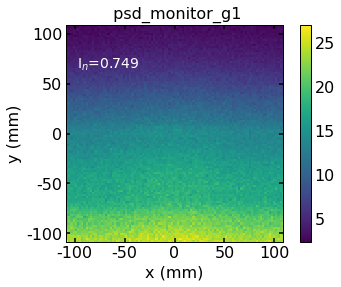

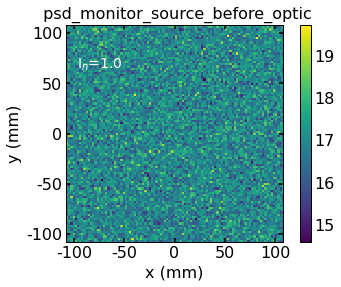

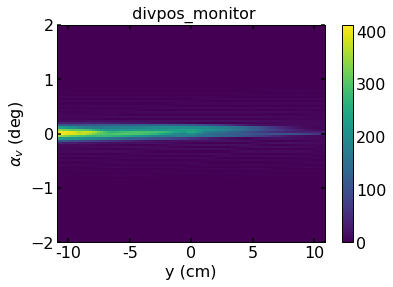

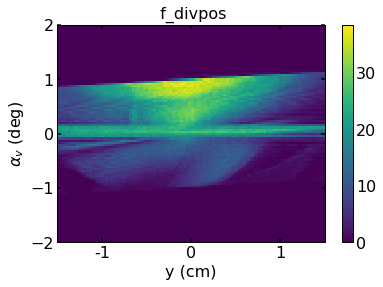

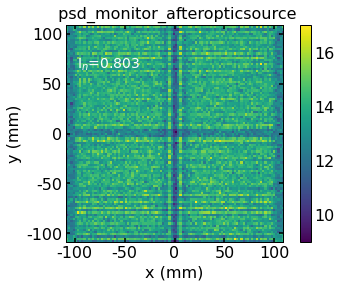

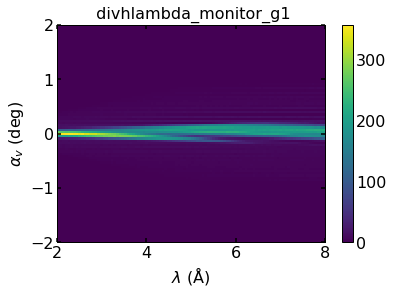

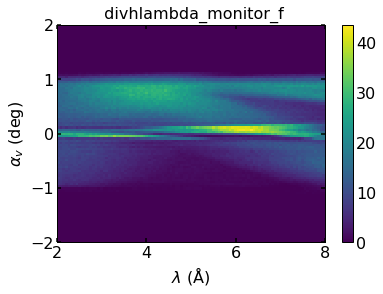

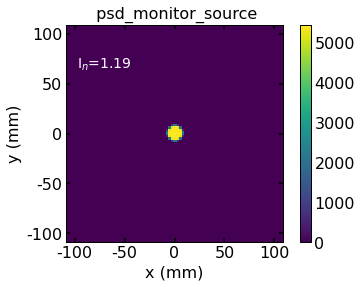

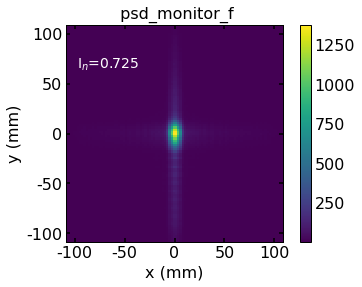

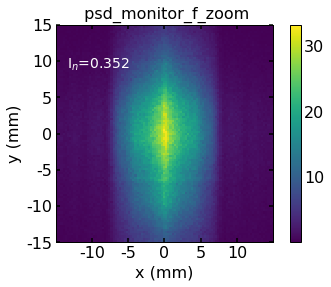

In [4]:
import image_thresholds
with open('data_smallmod/data_finite_g_length160finite_beamspot.txt', 'rb') as file:
    image_data = pickle.load(file)
with open('data_smallmod/meta_data_finite_g_length160finite_beamspot.txt', 'rb') as file:
    meta_data= pickle.load(file)

#Monitor directly after the source serves as normalizing value for intensity data
#norm = np.sum(image_data['source_psd.dat'])

images = sim.plot_last_images(meta_dicts=meta_data, image_data_dicts=image_data )
norm = image_data['source_psd_beforeoptic.dat']

for key in images.keys():
    print(key)
    fig, ax = images[key]
    if 'psd.' in key or '_psd_' in key: 
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        #print(ax.get_yticks())
        ax.set_xticks(ax.get_yticks()[1:-1])
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
        width = norm.shape[1]
        #print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, r'I$_n$={:.3}'.format(ratio), transform=ax.transAxes, color='white', fontsize=14)
        midy, midx = image_thresholds.return_com_array(image_data[key][:100])
        extent=[float(k) for k in meta_data[key][' xylimits'].split(' ')[1:]]
        #midy, midx = midy/99*21.8-21.8/2, midx/99*21.8-21.8/2
        #print(midy, midx, extent)
        figax = fig, ax
        #image_thresholds.plot_thresholds_circle(image_data[key][:100], xmid_px=midx, ymid_px=midy,\
        #     figax=figax, extent=extent, thresholds=[k/0.679 for k in [0.30, 0.5, 0.70]])
    
    elif 'zoom' in key:
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        ax.set_xticks(ax.get_yticks())
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])

        #rect = patches.Rectangle((-source_width/2, -source_width/2), source_width, source_width, linewidth=1, edgecolor='r', facecolor='none')
        #ax.add_patch(rect)
        width = norm.shape[1]
        #print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, r'I$_n$={:.3}'.format(ratio), transform=ax.transAxes, color='white', fontsize=14)
    
    ylabel = ax.get_ylabel()
    if 'divergence' in ylabel:
        ax.set_ylabel(r'$\alpha_v$ (deg)')
        if 'avelength' not in ax.get_xlabel():
            ax.set_xticklabels([int(round(k*100)) for k in ax.get_xticks()])
    if 'avelength' in ax.get_xlabel():
        ax.set_xlabel(r'$\lambda\ (\mathrm{\AA})$ ')
    if 'pos' in ax.get_xlabel():
        ax.set_xlabel(r'y (cm)')
    fig.savefig('figures_smallmod/{}_{}gravity.pdf'.format(key.split('.')[0], 'zero' if float(meta_data[key][' g']) == 0 else 'finite'))

# Exraction from short test guide finite beamspot no gravity
## Simulation of data
# Small beamspot

In [8]:
import run_mcstas
import matplotlib.patches as patches
import pickle
sim = run_mcstas.McstasSimulation('/home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/','parabolic_extraction.instr')
sim.init_params_dict()

#parameter insertion

source_width = 0.015
sim.num_neutrons = 1e7
gravity = 0

sim.gravity = True if gravity else False
pd = sim.params_dict
pd['g'] = gravity
pd['incoming_length'] = 5000
pd['source_width'] = source_width
pd['flux'] = sim.num_neutrons
pd['source_divergence'] = 2.5
pd['guide_length'] = 160
pd['guide_width'] = 0.218
pd['pixels'] = 100
pd['mirrors'] = 60
pd['focal_length'] = 6.0
pd['det_width'] = 0.218
pd['det_width_focus'] = 0.03
pd['placeholder'] = 1

#Simulation process

mcstring = sim.return_string_from_dict(pd)
print(mcstring)
print(sim.run_simulation(mcstring=mcstring, output=False))


mcrun /home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr det_width=0.218 det_width_focus=0.03 source_width=0.015 guide_width=0.218 L_source=5 guide_length=160 dL=3 L_min=2 L_max=8 source_divergence=2.5 divergence_max=1 focal_length=6.0 mirrors=60 incoming_length=5000 g=0 max_div=10 pixels=100 flux=10000000.0 placeholder=1
mcrun /home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr det_width=0.218 det_width_focus=0.03 source_width=0.015 guide_width=0.218 L_source=5 guide_length=160 dL=3 L_min=2 L_max=8 source_divergence=2.5 divergence_max=1 focal_length=6.0 mirrors=60 incoming_length=5000 g=0 max_div=10 pixels=100 flux=10000000.0 placeholder=1 -c -n 10000000.0
CompletedProcess(args=['mcrun', '/home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr', 'det_width=0.218', 'det_width_focus=0.03', 'source_width=0.015', 'guide_width=0.218', 'L_sour

In [9]:
import pickle
image_data = sim.return_images_data()
meta_data = sim.return_images_metadata()
print('data_smallmod/data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']))
with open('data_smallmod/data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(image_data, file)
with open('data_smallmod/meta_data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(meta_data, file)

data_shortguide/data_zero_g_length160finite_beamspot.txt


## Import data from pickle files

g1_psd.dat
source_psd_beforeoptic.dat
g1_divpos.dat


<ipython-input-13-cc344bbc3650>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
<ipython-input-13-cc344bbc3650>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
<ipython-input-13-cc344bbc3650>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(round(k*100)) for k in ax.get_xticks()])


f_divpos.dat
sourceafteroptic_psd.dat
g1_divv_lambda.dat


<ipython-input-13-cc344bbc3650>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(round(k*100)) for k in ax.get_xticks()])
<ipython-input-13-cc344bbc3650>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])


f_divv_lambda.dat
source_psd.dat
f_psd.dat


<ipython-input-13-cc344bbc3650>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
<ipython-input-13-cc344bbc3650>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
<ipython-input-13-cc344bbc3650>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])


f_psd_zoom.dat


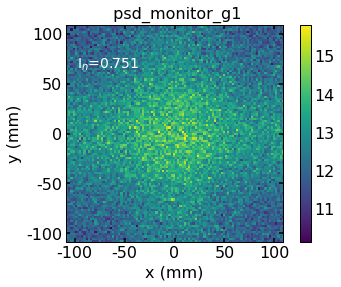

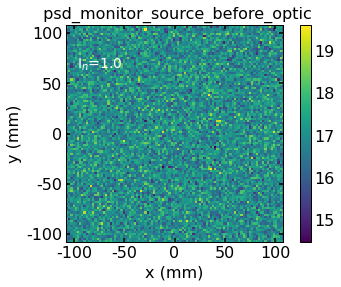

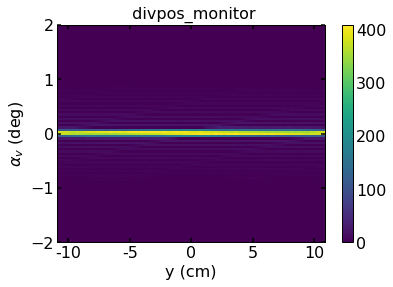

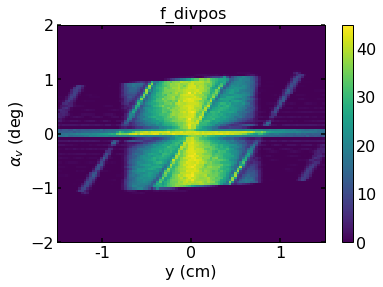

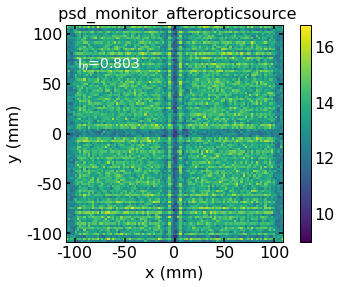

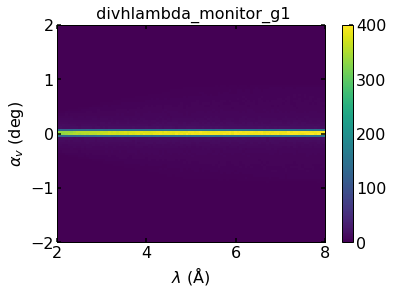

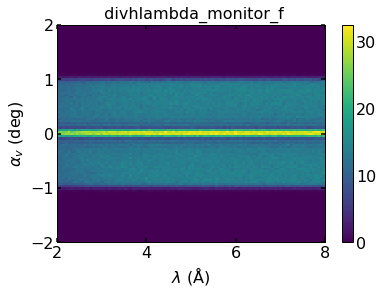

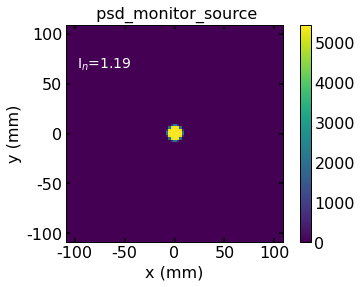

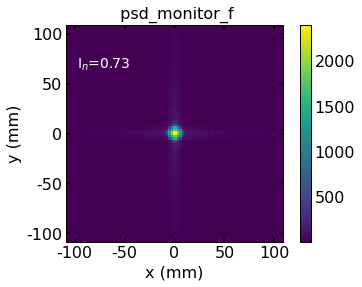

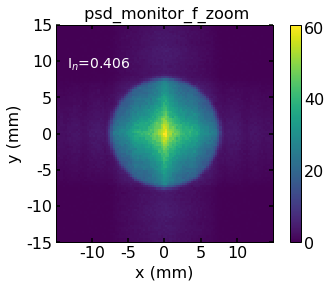

In [13]:
import image_thresholds
with open('data_smallmod/data_zero_g_length160finite_beamspot.txt', 'rb') as file:
    image_data = pickle.load(file)
with open('data_smallmod/meta_data_zero_g_length160finite_beamspot.txt', 'rb') as file:
    meta_data= pickle.load(file)

#Monitor directly after the source serves as normalizing value for intensity data
#norm = np.sum(image_data['source_psd.dat'])

images = sim.plot_last_images(meta_dicts=meta_data, image_data_dicts=image_data )
norm = image_data['source_psd_beforeoptic.dat']

for key in images.keys():
    print(key)
    fig, ax = images[key]
    if 'psd.' in key or '_psd_' in key: 
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        #print(ax.get_yticks())
        ax.set_xticks(ax.get_yticks()[1:-1])
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
        width = norm.shape[1]
        #print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, r'I$_n$={:.3}'.format(ratio), transform=ax.transAxes, color='white', fontsize=14)
        midy, midx = image_thresholds.return_com_array(image_data[key][:100])
        extent=[float(k) for k in meta_data[key][' xylimits'].split(' ')[1:]]
        #midy, midx = midy/99*21.8-21.8/2, midx/99*21.8-21.8/2
        #print(midy, midx, extent)
        figax = fig, ax
        #image_thresholds.plot_thresholds_circle(image_data[key][:100], xmid_px=midx, ymid_px=midy,\
        #     figax=figax, extent=extent, thresholds=[k/0.679 for k in [0.30, 0.5, 0.70]])
    
    elif 'zoom' in key:
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        ax.set_xticks(ax.get_yticks())
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])

        #rect = patches.Rectangle((-source_width/2, -source_width/2), source_width, source_width, linewidth=1, edgecolor='r', facecolor='none')
        #ax.add_patch(rect)
        width = norm.shape[1]
        #print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, r'I$_n$={:.3}'.format(ratio), transform=ax.transAxes, color='white', fontsize=14)
    
    ylabel = ax.get_ylabel()
    if 'divergence' in ylabel:
        ax.set_ylabel(r'$\alpha_v$ (deg)')
        if 'avelength' not in ax.get_xlabel():
            ax.set_xticklabels([int(round(k*100)) for k in ax.get_xticks()])
    if 'avelength' in ax.get_xlabel():
        ax.set_xlabel(r'$\lambda\ (\mathrm{\AA})$ ')
    if 'pos' in ax.get_xlabel():
        ax.set_xlabel(r'y (cm)')
    fig.savefig('figures_smallmod/{}_{}gravity.pdf'.format(key.split('.')[0], 'zero' if float(meta_data[key][' g']) == 0 else 'finite'))